<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        3481 non-null   object 
 1   Date        3481 non-null   object 
 2   PM2.5       3481 non-null   float64
 3   PM10        3481 non-null   float64
 4   NO          3481 non-null   float64
 5   NO2         3481 non-null   float64
 6   NOx         3481 non-null   float64
 7   NH3         3481 non-null   float64
 8   CO          3481 non-null   float64
 9   SO2         3481 non-null   float64
 10  O3          3481 non-null   float64
 11  Benzene     3481 non-null   float64
 12  Toluene     3481 non-null   float64
 13  AQI         3481 non-null   float64
 14  AQI_Bucket  3481 non-null   object 
dtypes: float64(12), object(3)
memory usage: 408.1+ KB


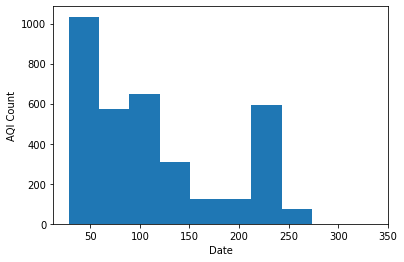

In [1]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

path = "blrdataset_smoted.csv"
df = pd.read_csv(path)
#to describe the dataframe
df.describe()
# to determine shape of dataframe
df.shape
#extra info about the dataset
df.info()
#to check null values in dataset
df.isnull()
df.isnull().sum()

plt.hist(df["AQI"])
plt.xlabel("Date")
plt.ylabel("AQI Count")
plt.show()




In [2]:
X=df.iloc[:, 1:-2] #except last 2 columns
y=df.iloc[:, 13:14] #only 13th column


In [3]:
y

,AQI
0,130.000000
1,103.000000
2,74.000000
3,75.000000
4,85.000000
...,...
3476,140.834015
3477,128.161272
3478,118.481144
3479,103.679947


splitting of dataset

In [4]:
df_x, df_x1, df_y, df_y1= train_test_split(X,y,test_size=0.3, random_state=42)
#df.drop(["City"], axis=1, inplace=True)
df_x["Date"] = pd.to_datetime(df_x["Date"]) #convert object to workable datatype acc to panda [datetime]
df_x1["Date"] = pd.to_datetime(df_x["Date"])
df_x["Date"] = pd.to_datetime(df_x["Date"])
df_x1["Date"] = pd.to_datetime(df_x["Date"])
X_train = df_x.drop(['Date'], axis = 1) #axis=1 means removing column
y_train = df_y["AQI"]
X_test = df_x1.drop(['Date'], axis = 1)
y_test = df_y1["AQI"]

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_x = StandardScaler() #standardize x values->normalize data->no bias
sc_y = StandardScaler()
X_train = sc_x.fit_transform(X_train) #use fit_transform for train and transform for test
X_test=sc_x.transform(X_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1)) #want numpy to determine what would be the dimension of y_train
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

In [6]:
df.head() #first 5 rows
rf=RandomForestRegressor(n_estimators = 1000, random_state = 42) #n_estimators->the number of trees you want to build before taking the maximum voting or averages of predictions.
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
y_test

array([[-0.9371146 ],
       [-0.49188946],
       [-0.76493069],
       ...,
       [ 0.02545182],
       [-0.99759128],
       [ 1.42313953]])

calculating metrics


In [7]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_pred)
mean_error = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.9596849395934438
mean_sqrd_error is  0.039568990455631656
Root mean squared error of is 0.19891955775044257
Mean Absolute error is 0.09692928311732912


In [8]:
y_test.reshape(-1,1) #specifies the new shape of the array w/o changing data inside
y_test

array([[-0.9371146 ],
       [-0.49188946],
       [-0.76493069],
       ...,
       [ 0.02545182],
       [-0.99759128],
       [ 1.42313953]])

In [9]:
y_pred.reshape(-1,1)

array([[-0.93611878],
       [-0.5195554 ],
       [-0.64852047],
       ...,
       [ 0.21102578],
       [-0.99191855],
       [ 1.41836347]])

plotting graphs

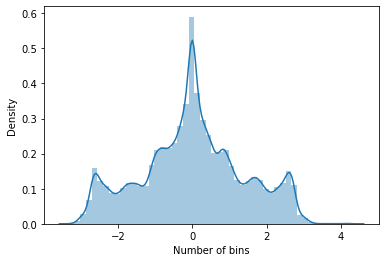

In [10]:
predictions = rf.predict(X_test)
fig = sns.distplot(y_test-predictions) #using the seaborn library we create an histogram of predicted values
plt.xlabel("Number of bins")
plt.ylabel("Density")
plt.show(fig) 

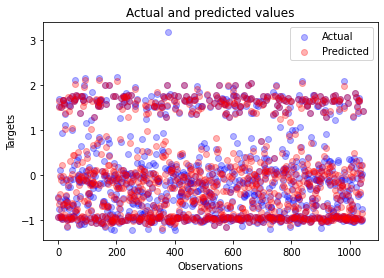

In [11]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Targets')
plt.legend()
plt.show()

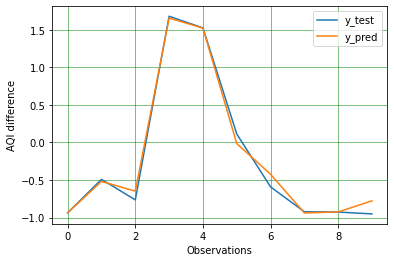

In [12]:
plt.plot(y_test.reshape(-1,1)[0:10])
plt.plot(y_pred.reshape(-1,1)[0:10])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Observations')
plt.ylabel('AQI difference')
plt.gca().legend(('y_test','y_pred'))
plt.show()

In [13]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_pred
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["ACC OR NOT"] = np.where(abs(result["DIFFERENCE"])<= 0.5, "Accurate", "Inaccurate")
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(21)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,ACC OR NOT,PERCENTAGE ERROR
0,-0.937115,-0.936119,-0.000996,Accurate,-0.106264
1,-0.491889,-0.519555,0.027666,Accurate,-5.624423
2,-0.764931,-0.648520,-0.116410,Accurate,-15.218401
3,1.678678,1.653428,0.025249,Accurate,1.504121
4,1.522971,1.520547,0.002424,Accurate,0.159139
5,0.111675,-0.015783,0.127458,Accurate,114.132971
6,-0.592484,-0.424438,-0.168046,Accurate,-28.362991
7,-0.923677,-0.939079,0.015402,Accurate,-1.667429
8,-0.926793,-0.925186,-0.001607,Accurate,-0.173446
9,-0.951748,-0.777145,-0.174604,Accurate,-18.345554
